# Finding schedule diff and dummies

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import skew, norm
import seaborn as sns
%matplotlib inline

In [16]:
train=pd.read_csv('dataset/train.csv')
test=pd.read_csv('dataset/test.csv')

# EDA & Preprocessing

In [17]:
train.shape, test.shape

((6500, 20), (3500, 19))

In [18]:
train.head()

,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost
0,fffe3900350033003300,Billy Jenkins,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,No,06/07/15,06/03/15,"New Michelle, OH 50777",-283.29
1,fffe3800330031003900,Jean Bryant,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,No,03/06/17,03/05/17,"New Michaelport, WY 12072",-159.96
2,fffe3600370035003100,Laura Miller,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,Yes,03/09/15,03/08/15,"Bowmanshire, WA 19241",-154.29
3,fffe350031003300,Robert Chaires,0.12,9.0,NaN,NaN,Aluminium,5.81,16.31,No,No,No,NaN,No,Wealthy,Yes,05/24/15,05/20/15,"East Robyn, KY 86375",-161.16
4,fffe3900320038003400,Rosalyn Krol,0.15,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,No,12/18/16,12/14/16,"Aprilside, PA 52793",-159.23


In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6500 entries, 0 to 6499
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer Id            6500 non-null   object 
 1   Artist Name            6500 non-null   object 
 2   Artist Reputation      5750 non-null   float64
 3   Height                 6125 non-null   float64
 4   Width                  5916 non-null   float64
 5   Weight                 5913 non-null   float64
 6   Material               5736 non-null   object 
 7   Price Of Sculpture     6500 non-null   float64
 8   Base Shipping Price    6500 non-null   float64
 9   International          6500 non-null   object 
 10  Express Shipment       6500 non-null   object 
 11  Installation Included  6500 non-null   object 
 12  Transport              5108 non-null   object 
 13  Fragile                6500 non-null   object 
 14  Customer Information   6500 non-null   object 
 15  Remo

In [20]:
train.dtypes==object

Customer Id               True
Artist Name               True
Artist Reputation        False
Height                   False
Width                    False
Weight                   False
Material                  True
Price Of Sculpture       False
Base Shipping Price      False
International             True
Express Shipment          True
Installation Included     True
Transport                 True
Fragile                   True
Customer Information      True
Remote Location           True
Scheduled Date            True
Delivery Date             True
Customer Location         True
Cost                     False
dtype: bool

In [21]:
# for i in train.columns:
#     if train[i].dtype==object:
#         print(train[i].value_counts())

In [22]:
train.columns

Index(['Customer Id', 'Artist Name', 'Artist Reputation', 'Height', 'Width',
       'Weight', 'Material', 'Price Of Sculpture', 'Base Shipping Price',
       'International', 'Express Shipment', 'Installation Included',
       'Transport', 'Fragile', 'Customer Information', 'Remote Location',
       'Scheduled Date', 'Delivery Date', 'Customer Location', 'Cost'],
      dtype='object')

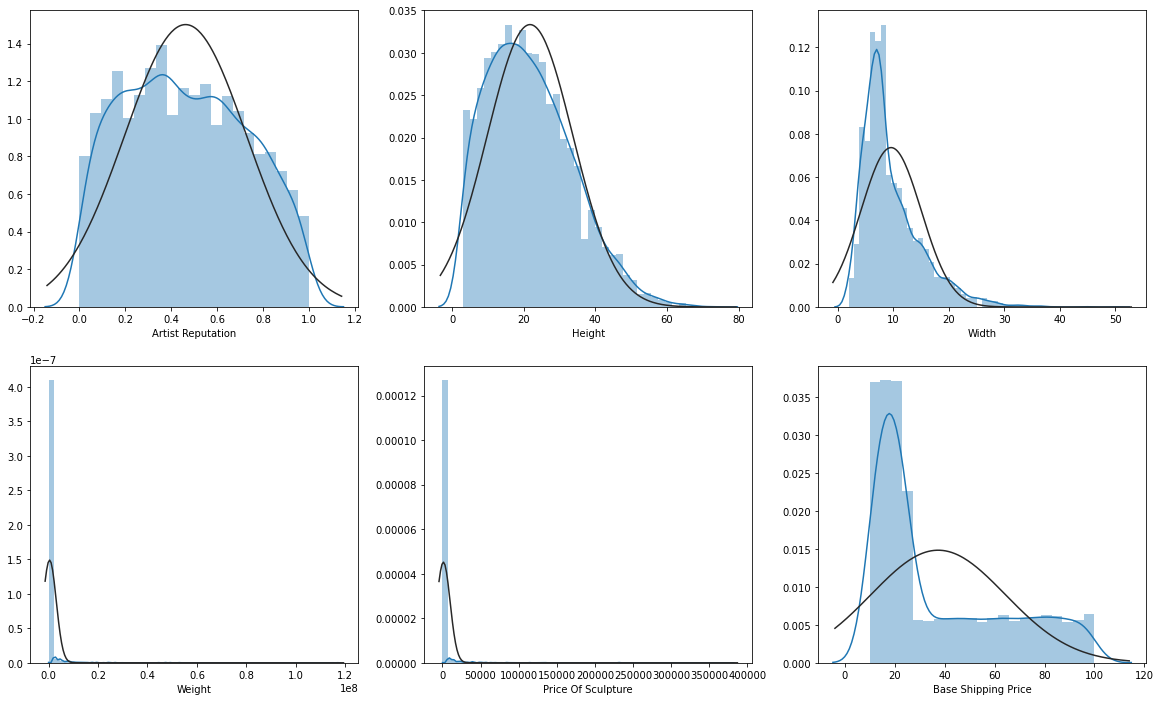

In [23]:
norm_train=train.drop(['Cost'], axis=1)
fig, ax=plt.subplots(2,3, figsize=(20,12))
r=0
c=0
for i in norm_train.columns:
    if norm_train[i].dtype==float:
    
        sns.distplot(norm_train[i], kde=True, hist=True, fit=norm, ax=ax[r, c])
        c+=1
        if c==3:
            r=1
            c=0

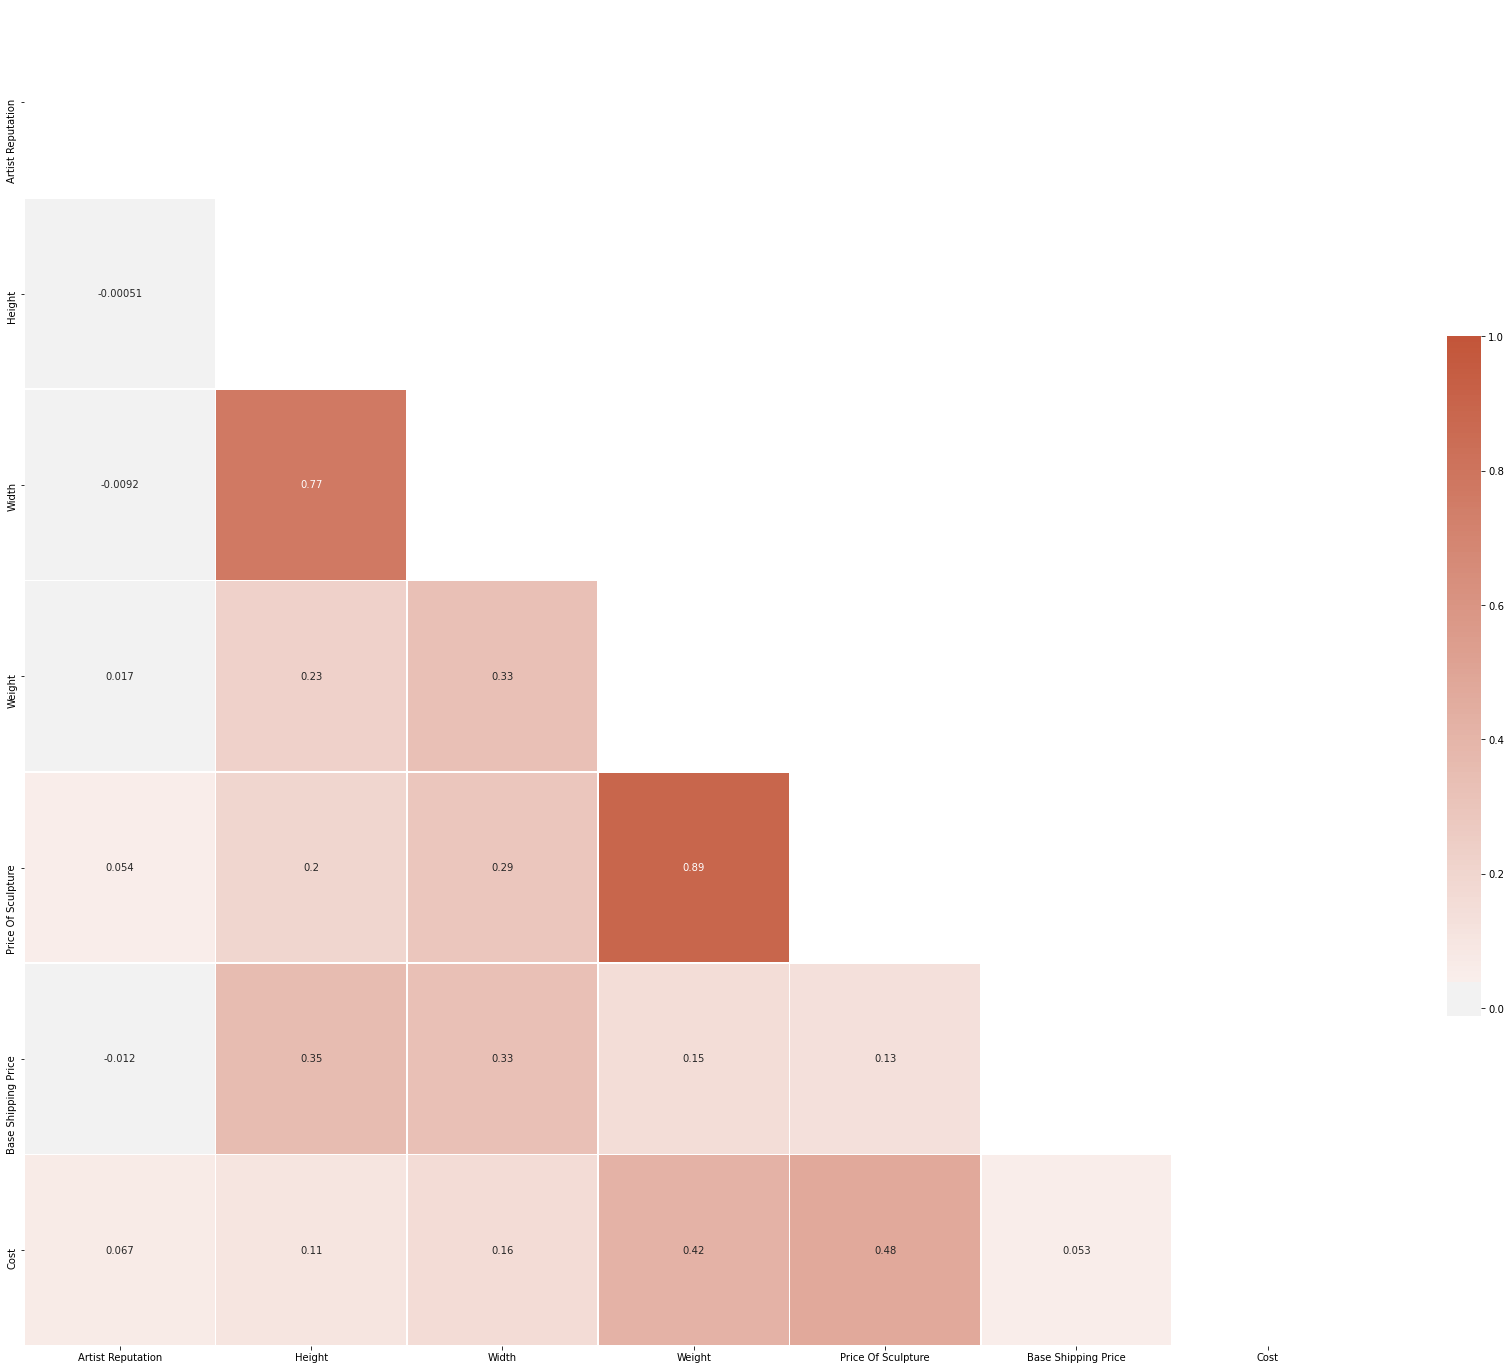

In [24]:
#Correlation matrix
f, ax=plt.subplots(figsize=(30, 25))
mat=train.corr('pearson')
mask=np.triu(np.ones_like(mat, dtype=bool))
cmap=sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(mat, mask=mask, cmap=cmap, vmax=1, center=0, annot=True, square=True,
           linewidth=.5, cbar_kws={"shrink":.5})
plt.show()

In [25]:
y=train['Cost']
train.drop(['Cost'], axis=1, inplace=True)

In [26]:
combine=pd.concat([train, test], axis=0, sort=False)
train.shape, test.shape, combine.shape

((6500, 19), (3500, 19), (10000, 19))

In [27]:
for i in combine.columns:
    if combine[i].dtype==object:
        print(combine[i].value_counts())
        print(combine[i].unique())

fffe3400370039003900    1
fffe3700390036003900    1
fffe3300320038003700    1
fffe3200300039003000    1
fffe3300310037003800    1
                       ..
fffe3200340034003500    1
fffe3200390030003600    1
fffe3900370035003100    1
fffe3300380037003100    1
fffe3600330035003200    1
Name: Customer Id, Length: 10000, dtype: int64
['fffe3900350033003300' 'fffe3800330031003900' 'fffe3600370035003100' ...
 'fffe3200350031003700' 'fffe3100380031003000' 'fffe3200340037003300']
James Moore        4
John Brown         4
Robert Williams    4
Robert Davis       4
James Smith        3
                  ..
Sean Mcwhirter     1
Justin Carney      1
Joshua Bush        1
Pete Oh            1
Eula Westbrook     1
Name: Artist Name, Length: 9865, dtype: int64
['Billy Jenkins' 'Jean Bryant' 'Laura Miller' ... 'Lashawnda Walton'
 'Rita Battee' 'Paul Jones']
Aluminium    1367
Bronze       1363
Brass        1340
Clay         1313
Wood         1307
Marble       1302
Stone        1244
Name: Material, dtype

In [28]:
# for i in combine['Scheduled Date'].unique():
#     print(i)

In [29]:
combine.drop(['Customer Id'], axis=1, inplace=True)

In [30]:
# #Drop Id (all unique values), Location (only 1 location repeated 2 times others are unique)
# combine.drop(['Customer Id', 'Customer Location'], axis=1, inplace=True)
# combine.shape

In [31]:
# #As scheduled and delivery dates does not effect the cost
# combine.drop(['Scheduled Date', 'Delivery Date'], axis=1, inplace=True)
# combine.shape

In [32]:
combine.dtypes==float

Artist Name              False
Artist Reputation         True
Height                    True
Width                     True
Weight                    True
Material                 False
Price Of Sculpture        True
Base Shipping Price       True
International            False
Express Shipment         False
Installation Included    False
Transport                False
Fragile                  False
Customer Information     False
Remote Location          False
Scheduled Date           False
Delivery Date            False
Customer Location        False
dtype: bool

In [33]:
#Looking at NaN % within data

nan=pd.DataFrame(combine.isna().sum(), columns=['NaN_sum'])
nan['feat']=nan.index
nan['Perc%']=(nan['NaN_sum']/10000)*100
nan=nan[nan['NaN_sum']>0]
nan=nan.sort_values(by=['NaN_sum'])
nan['Usability']=np.where(nan['Perc%']>20, 'Discard', 'Keep')
nan

,NaN_sum,feat,Perc%,Usability
Height,494,Height,4.94,Keep
Width,725,Width,7.25,Keep
Weight,736,Weight,7.36,Keep
Material,764,Material,7.64,Keep
Remote Location,771,Remote Location,7.71,Keep
Artist Reputation,972,Artist Reputation,9.72,Keep
Transport,1624,Transport,16.24,Keep


<AxesSubplot:>

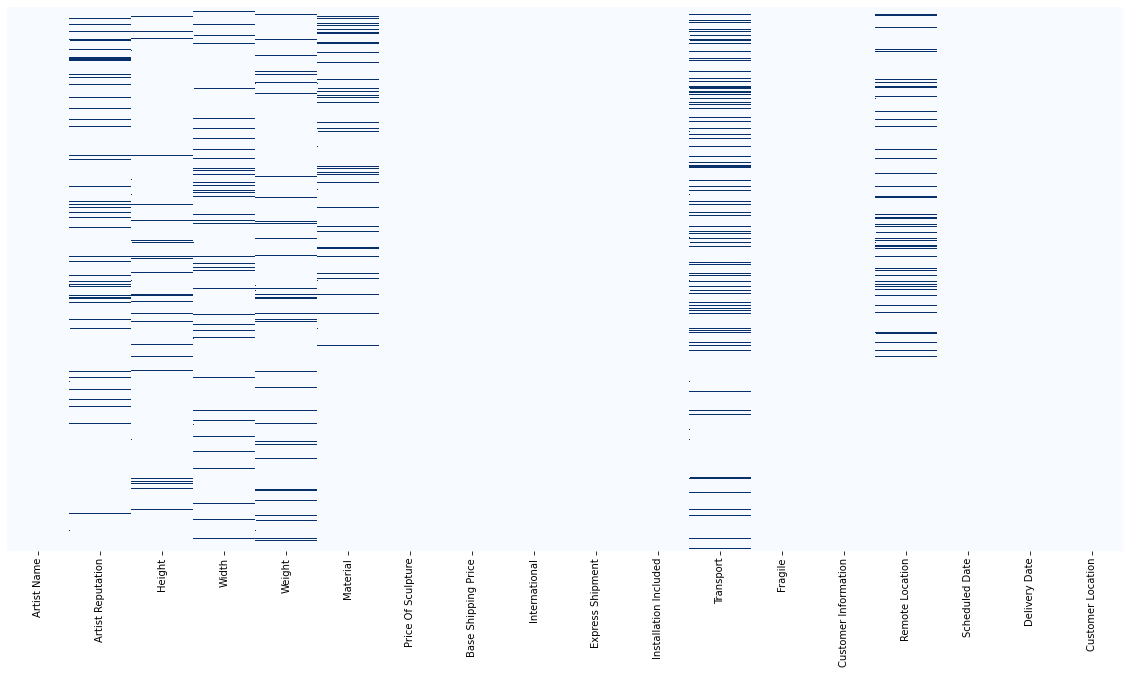

In [34]:
plt.figure(figsize=[20,10])
sns.heatmap(combine.isnull(), yticklabels=False, cbar=False, cmap='Blues')

In [35]:
from sklearn.impute import KNNImputer
impute=KNNImputer()
colsf=combine.select_dtypes(include=float).columns
combine[colsf]=impute.fit_transform(combine.select_dtypes(include=float))

<AxesSubplot:>

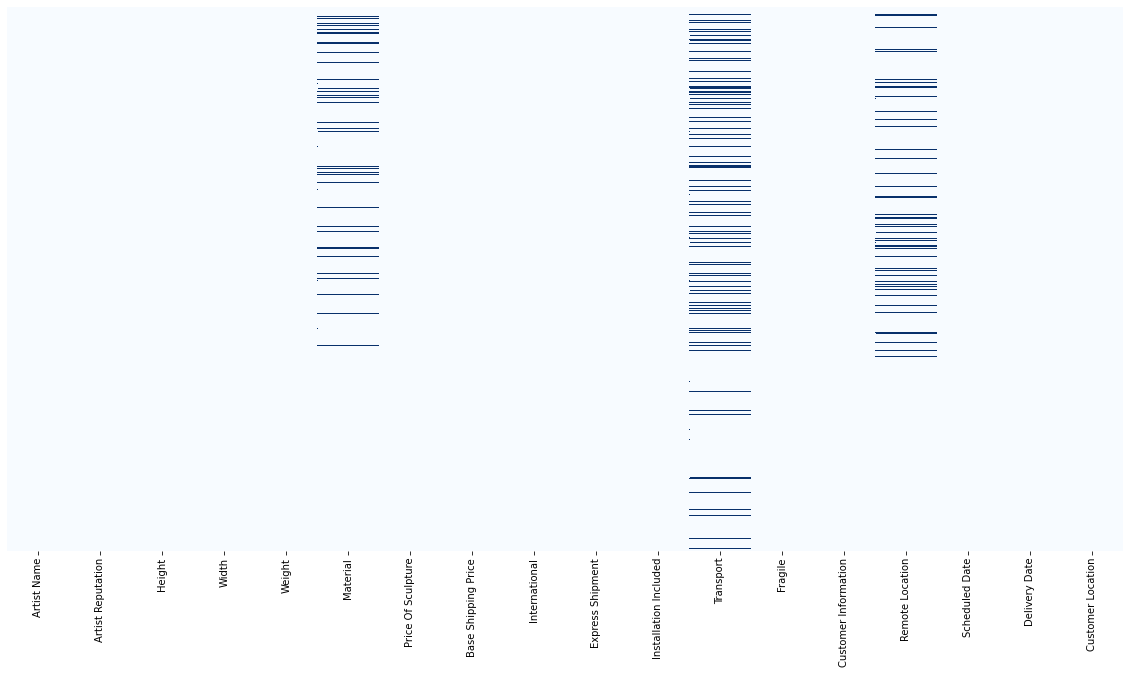

In [36]:
plt.figure(figsize=[20,10])
sns.heatmap(combine.isnull(), yticklabels=False, cbar=False, cmap='Blues')

<AxesSubplot:xlabel='Material', ylabel='count'>

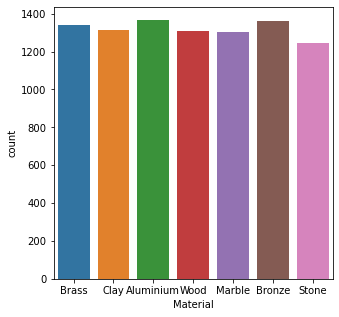

In [37]:
plt.figure(figsize=[5,5])
sns.countplot(x='Material', data=combine)

<AxesSubplot:xlabel='Transport', ylabel='count'>

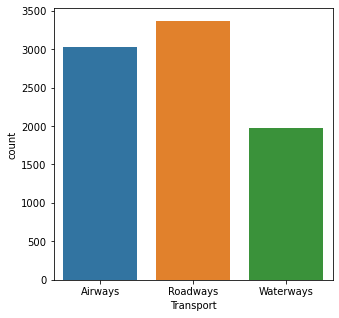

In [38]:
plt.figure(figsize=[5,5])
sns.countplot(x='Transport', data=combine)

<AxesSubplot:xlabel='Remote Location', ylabel='count'>

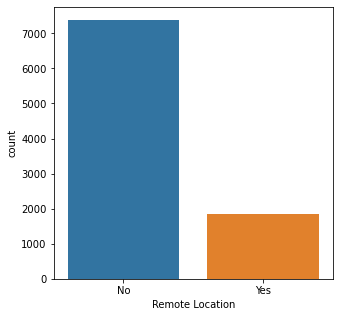

In [39]:
plt.figure(figsize=[5,5])
sns.countplot(x='Remote Location', data=combine)

In [40]:
combine['Material']=combine['Material'].fillna(combine['Material'].mode()[0])
combine['Transport']=combine['Transport'].fillna(combine['Transport'].mode()[0])
combine['Remote Location']=combine['Remote Location'].fillna(combine['Remote Location'].mode()[0])

In [41]:
# plt.figure(figsize=[20,10])
# sns.heatmap(combine.isnull(), yticklabels=False, cbar=False, cmap='Blues')

In [42]:
for i in combine.columns:
    if combine[i].dtype==object:
        print(combine[i].value_counts())
#         print(combine[i].unique())

James Moore        4
John Brown         4
Robert Williams    4
Robert Davis       4
James Smith        3
                  ..
Sean Mcwhirter     1
Justin Carney      1
Joshua Bush        1
Pete Oh            1
Eula Westbrook     1
Name: Artist Name, Length: 9865, dtype: int64
Aluminium    2131
Bronze       1363
Brass        1340
Clay         1313
Wood         1307
Marble       1302
Stone        1244
Name: Material, dtype: int64
No     6620
Yes    3380
Name: International, dtype: int64
No     6697
Yes    3303
Name: Express Shipment, dtype: int64
No     6038
Yes    3962
Name: Installation Included, dtype: int64
Roadways     4990
Airways      3033
Waterways    1977
Name: Transport, dtype: int64
No     8395
Yes    1605
Name: Fragile, dtype: int64
Working Class    7381
Wealthy          2619
Name: Customer Information, dtype: int64
No     8154
Yes    1846
Name: Remote Location, dtype: int64
04/27/15    16
07/17/15    15
05/19/19    15
08/05/19    14
08/23/16    14
            ..
05/14/15    

In [81]:
dummy_combine=pd.DataFrame.copy(combine)
dummy_combine.shape

(10000, 18)

In [82]:
# pd.get_dummies(combine['Material'])

In [83]:
dummy=pd.get_dummies(combine['Material'])
dummy.columns=['Material_Aluminium', 'Material_Brass', 'Material_Bronze', 'Material_Clay', 'Material_Marble', 'Material_Stone', 'Material_Wood']
dummy_combine=pd.concat([dummy_combine, dummy], axis=1)
dummy_combine.shape

(10000, 25)

In [84]:
dummy=pd.get_dummies(combine['International'])
dummy.columns=['International_No', 'International_Yes']
dummy_combine=pd.concat([dummy_combine, dummy], axis=1)
dummy_combine.shape

(10000, 27)

In [85]:
dummy=pd.get_dummies(combine['Express Shipment'])
dummy.columns=['ExpressShipment_No', 'ExpressShipment_Yes']
dummy_combine=pd.concat([dummy_combine, dummy], axis=1)
dummy_combine.shape

(10000, 29)

In [86]:
dummy=pd.get_dummies(combine['Installation Included'])
dummy.columns=['InstallationIncluded_No', 'InstallationIncluded_Yes']
dummy_combine=pd.concat([dummy_combine, dummy], axis=1)
dummy_combine.shape

(10000, 31)

In [87]:
dummy=pd.get_dummies(combine['Transport'])
dummy.columns=['Transport_Airways', 'Transport_Roadways','Transport_Waterways']
dummy_combine=pd.concat([dummy_combine, dummy], axis=1)
dummy_combine.shape

(10000, 34)

In [88]:
dummy=pd.get_dummies(combine['Fragile'])
dummy.columns=['Fragile_No', 'Fragile_Yes']
dummy_combine=pd.concat([dummy_combine, dummy], axis=1)
dummy_combine.shape

(10000, 36)

In [89]:
dummy=pd.get_dummies(combine['Customer Information'])
dummy.columns=['CustomerInformation_Wealthy', 'CustomerInformation_WorkingClass']
dummy_combine=pd.concat([dummy_combine, dummy], axis=1)
dummy_combine.shape

(10000, 38)

In [90]:
dummy=pd.get_dummies(combine['Remote Location'])
dummy.columns=['RemoteLocation_No', 'RemoteLocation_Yes']
dummy_combine=pd.concat([dummy_combine, dummy], axis=1)
dummy_combine.shape

(10000, 40)

In [91]:
dummy_combine.drop(['Remote Location', 'Customer Information', 'Fragile', 'Transport', 'Installation Included', 'Express Shipment', 'International', 'Material'],
                    axis=1, inplace=True)
dummy_combine.shape

(10000, 32)

In [92]:
dummy_combine.select_dtypes(exclude=np.number).columns

Index(['Artist Name', 'Scheduled Date', 'Delivery Date', 'Customer Location'], dtype='object')

In [93]:
#dummy_combine['Scheduled Date']

In [94]:
temp1=pd.to_datetime(dummy_combine['Scheduled Date'])
temp2=pd.to_datetime(dummy_combine['Delivery Date'])

In [95]:
temp3=temp2-temp1
temp3.map(lambda x: int(str(x).split()[0]))

0      -4
1      -1
2      -1
3      -4
4      -4
       ..
3495    0
3496    4
3497    1
3498    0
3499   -4
Length: 10000, dtype: int64

In [96]:
dummy_combine['Schedule diff']=pd.to_numeric(temp3)

In [97]:
from sklearn.preprocessing import LabelEncoder

In [98]:
# le=LabelEncoder()
# temp4=le.fit_transform(dummy_combine['Customer Location'])
# temp4

In [99]:
dummy_combine.dtypes

Artist Name                          object
Artist Reputation                   float64
Height                              float64
Width                               float64
Weight                              float64
Price Of Sculpture                  float64
Base Shipping Price                 float64
Scheduled Date                       object
Delivery Date                        object
Customer Location                    object
Material_Aluminium                    uint8
Material_Brass                        uint8
Material_Bronze                       uint8
Material_Clay                         uint8
Material_Marble                       uint8
Material_Stone                        uint8
Material_Wood                         uint8
International_No                      uint8
International_Yes                     uint8
ExpressShipment_No                    uint8
ExpressShipment_Yes                   uint8
InstallationIncluded_No               uint8
InstallationIncluded_Yes        

In [100]:
dummy_combine.drop(['Artist Name', 'Scheduled Date', 'Delivery Date', 'Customer Location'], axis=1, inplace=True)
dummy_combine.shape

(10000, 29)

In [101]:
# dummy_combine.dtypes==object

In [102]:
# du.shape, dummy_combine.shape, train.shape, test.shape

In [103]:
x_train=dummy_combine[:6500]
x_test=dummy_combine[6500:]
x_train.shape, x_test.shape

((6500, 29), (3500, 29))

In [104]:
yabs=y.abs()

In [105]:
ynp=np.log1p(abs(y))

In [106]:
ynp

0       5.649995
1       5.081156
2       5.045294
3       5.088584
4       5.076610
          ...   
6495    6.772428
6496    7.206392
6497    5.873666
6498    8.524864
6499    6.584059
Name: Cost, Length: 6500, dtype: float64

<AxesSubplot:xlabel='Cost'>

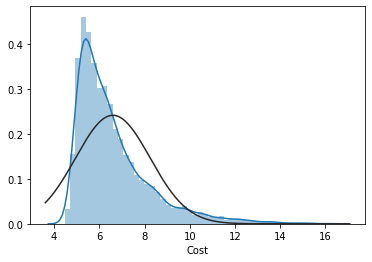

In [107]:
sns.distplot(ynp, kde=True, hist=True, fit=norm)

# Model Testing

In [108]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

# Training on whole data without scaling using Log value and then taking Exponent

In [110]:
rf=RandomForestRegressor()
rf.fit(x_train, ynp)
y_test=pd.DataFrame(np.expm1(rf.predict(x_test)))
fin=pd.concat([test['Customer Id'], y_test], axis=1)
fin.columns=['Customer Id', 'Cost']
fin.to_csv('rf.csv', index=False)
# fin.min()
# 91.77392 

In [111]:
gbr=GradientBoostingRegressor()
gbr.fit(x_train, ynp)
y_test=pd.DataFrame(np.expm1(gbr.predict(x_test)))
fin=pd.concat([test['Customer Id'], y_test], axis=1)
fin.columns=['Customer Id', 'Cost']
fin.to_csv('gbr.csv', index=False)
# fin.min(), fin.max()
# 88.79992

In [112]:
xgb=XGBRegressor()
xgb.fit(x_train, ynp)
y_test=pd.DataFrame(np.expm1(xgb.predict(x_test)))
fin=pd.concat([test['Customer Id'], y_test], axis=1)
fin.columns=['Customer Id', 'Cost']
fin.to_csv('xgb.csv', index=False)
# fin.min(), fin.max()
# 93.35467

In [113]:
lgb=LGBMRegressor()
lgb.fit(x_train, ynp)
y_test=pd.DataFrame(np.expm1(lgb.predict(x_test)))
fin=pd.concat([test['Customer Id'], y_test], axis=1)
fin.columns=['Customer Id', 'Cost']
fin.to_csv('lgb.csv', index=False)
# fin.min(), fin.max()
# 93.26303

In [114]:
cat=CatBoostRegressor(logging_level='Silent')
cat.fit(x_train, ynp)
y_test=pd.DataFrame(np.expm1(cat.predict(x_test)))
fin=pd.concat([test['Customer Id'], y_test], axis=1)
fin.columns=['Customer Id', 'Cost']
fin.to_csv('cat.csv', index=False)
# fin.min(), fin.max()
# 94.23855

In [115]:
estimators=[('RF', RandomForestRegressor()), ('XGB', XGBRegressor()), ('LGB', LGBMRegressor()), ('GBR', GradientBoostingRegressor()), ('CAT', CatBoostRegressor(logging_level='Silent'))]
vc=VotingRegressor(estimators=estimators)
vc.fit(x_train, ynp)
y_test=pd.DataFrame(np.expm1(vc.predict(x_test)))
fin=pd.concat([test['Customer Id'], y_test], axis=1)
fin.columns=['Customer Id', 'Cost']
fin.to_csv('vc.csv', index=False)
# fin.min(), fin.max()
# 93.78955

In [118]:
estimators=[('XGB', XGBRegressor()), ('LGB', LGBMRegressor()), ('CAT', CatBoostRegressor(logging_level='Silent'))]
vc=VotingRegressor(estimators=estimators)
vc.fit(x_train, ynp)
y_test=pd.DataFrame(np.expm1(vc.predict(x_test)))
fin=pd.concat([test['Customer Id'], y_test], axis=1)
fin.columns=['Customer Id', 'Cost']
fin.to_csv('vc1.csv', index=False)
# fin.min(), fin.max()
# 94.48455

In [116]:
estimators=[('RF', RandomForestRegressor()), ('XGB', XGBRegressor()), ('LGB', LGBMRegressor()), ('CAT', CatBoostRegressor(logging_level='Silent'))]
st=StackingRegressor(estimators=estimators, final_estimator=CatBoostRegressor(logging_level='Silent'))
st.fit(x_train, ynp)
y_test=pd.DataFrame(np.expm1(st.predict(x_test)))
fin=pd.concat([test['Customer Id'], y_test], axis=1)
fin.columns=['Customer Id', 'Cost']
fin.to_csv('st.csv', index=False)
# fin.min(), fin.max()
# 93.89637

In [119]:
estimators=[('XGB', XGBRegressor()), ('LGB', LGBMRegressor()), ('CAT', CatBoostRegressor(logging_level='Silent'))]
st=StackingRegressor(estimators=estimators, final_estimator=CatBoostRegressor(logging_level='Silent'))
st.fit(x_train, ynp)
y_test=pd.DataFrame(np.expm1(st.predict(x_test)))
fin=pd.concat([test['Customer Id'], y_test], axis=1)
fin.columns=['Customer Id', 'Cost']
fin.to_csv('st1.csv', index=False)
# fin.min(), fin.max()
# 93.94610

In [120]:
estimators=[('XGB', XGBRegressor()), ('LGB', LGBMRegressor()), ('CAT', CatBoostRegressor(logging_level='Silent'))]
st=StackingRegressor(estimators=estimators, final_estimator=RandomForestRegressor())
st.fit(x_train, ynp)
y_test=pd.DataFrame(np.expm1(st.predict(x_test)))
fin=pd.concat([test['Customer Id'], y_test], axis=1)
fin.columns=['Customer Id', 'Cost']
fin.to_csv('st2.csv', index=False)
# fin.min(), fin.max()
# 93.58970

In [121]:
estimators=[('XGB', XGBRegressor()), ('LGB', LGBMRegressor()), ('CAT', CatBoostRegressor(logging_level='Silent'))]
st=StackingRegressor(estimators=estimators, final_estimator=XGBRegressor())
st.fit(x_train, ynp)
y_test=pd.DataFrame(np.expm1(st.predict(x_test)))
fin=pd.concat([test['Customer Id'], y_test], axis=1)
fin.columns=['Customer Id', 'Cost']
fin.to_csv('st3.csv', index=False)
# fin.min(), fin.max()
# 93.46539

# Training on whole data after scaling using Log value and then taking Exponent

In [122]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_sc_train=sc.fit_transform(x_train)
x_sc_test=sc.transform(x_test)

In [123]:
rf=RandomForestRegressor()
rf.fit(x_sc_train, ynp)
y_test=pd.DataFrame(np.expm1(rf.predict(x_sc_test)))
fin=pd.concat([test['Customer Id'], y_test], axis=1)
fin.columns=['Customer Id', 'Cost']
fin.to_csv('rfsc.csv', index=False)
# fin.min()
# 91.87680

In [124]:
gbr=GradientBoostingRegressor()
gbr.fit(x_sc_train, ynp)
y_test=pd.DataFrame(np.expm1(gbr.predict(x_sc_test)))
fin=pd.concat([test['Customer Id'], y_test], axis=1)
fin.columns=['Customer Id', 'Cost']
fin.to_csv('gbrsc.csv', index=False)
# fin.min(), fin.max()
# 88.81242

In [125]:
xgb=XGBRegressor()
xgb.fit(x_sc_train, ynp)
y_test=pd.DataFrame(np.expm1(xgb.predict(x_sc_test)))
fin=pd.concat([test['Customer Id'], y_test], axis=1)
fin.columns=['Customer Id', 'Cost']
fin.to_csv('xgbsc.csv', index=False)
# fin.min(), fin.max()
# 93.34781

In [126]:
lgb=LGBMRegressor()
lgb.fit(x_sc_train, ynp)
y_test=pd.DataFrame(np.expm1(lgb.predict(x_sc_test)))
fin=pd.concat([test['Customer Id'], y_test], axis=1)
fin.columns=['Customer Id', 'Cost']
fin.to_csv('lgbsc.csv', index=False)
# fin.min(), fin.max()
# 92.60104

In [127]:
cat=CatBoostRegressor(logging_level='Silent')
cat.fit(x_sc_train, ynp)
y_test=pd.DataFrame(np.expm1(cat.predict(x_sc_test)))
fin=pd.concat([test['Customer Id'], y_test], axis=1)
fin.columns=['Customer Id', 'Cost']
fin.to_csv('catsc.csv', index=False)
# fin.min(), fin.max()
# 94.24715

In [128]:
estimators=[('RF', RandomForestRegressor()), ('XGB', XGBRegressor()), ('LGB', LGBMRegressor()), ('GBR', GradientBoostingRegressor()), ('CAT', CatBoostRegressor(logging_level='Silent'))]
vc=VotingRegressor(estimators=estimators)
vc.fit(x_sc_train, ynp)
y_test=pd.DataFrame(np.expm1(vc.predict(x_sc_test)))
fin=pd.concat([test['Customer Id'], y_test], axis=1)
fin.columns=['Customer Id', 'Cost']
fin.to_csv('vcsc.csv', index=False)
# fin.min(), fin.max()
# 93.67053

In [130]:
estimators=[('XGB', XGBRegressor()), ('LGB', LGBMRegressor()), ('CAT', CatBoostRegressor(logging_level='Silent'))]
vc=VotingRegressor(estimators=estimators)
vc.fit(x_sc_train, ynp)
y_test=pd.DataFrame(np.expm1(vc.predict(x_sc_test)))
fin=pd.concat([test['Customer Id'], y_test], axis=1)
fin.columns=['Customer Id', 'Cost']
fin.to_csv('vcsc1.csv', index=False)
# fin.min(), fin.max()
# 94.24672

In [129]:
estimators=[('RF', RandomForestRegressor()), ('XGB', XGBRegressor()), ('LGB', LGBMRegressor()), ('CAT', CatBoostRegressor(logging_level='Silent'))]
st=StackingRegressor(estimators=estimators, final_estimator=CatBoostRegressor(logging_level='Silent'))
st.fit(x_sc_train, ynp)
y_test=pd.DataFrame(np.expm1(st.predict(x_sc_test)))
fin=pd.concat([test['Customer Id'], y_test], axis=1)
fin.columns=['Customer Id', 'Cost']
fin.to_csv('stsc.csv', index=False)
# fin.min(), fin.max()
# 93.92679

In [131]:
estimators=[ ('XGB', XGBRegressor()), ('LGB', LGBMRegressor()), ('CAT', CatBoostRegressor(logging_level='Silent'))]
st=StackingRegressor(estimators=estimators, final_estimator=CatBoostRegressor(logging_level='Silent'))
st.fit(x_sc_train, ynp)
y_test=pd.DataFrame(np.expm1(st.predict(x_sc_test)))
fin=pd.concat([test['Customer Id'], y_test], axis=1)
fin.columns=['Customer Id', 'Cost']
fin.to_csv('stsc1.csv', index=False)
# fin.min(), fin.max()
# 93.62576

# Hyperparameter tuning

In [49]:
from sklearn.model_selection import GridSearchCV

# After tuning on scaled data

In [132]:
cat=CatBoostRegressor(iterations=1000, learning_rate=0.03, l2_leaf_reg=3.0, depth=16, grow_policy='Lossguide', loss_function='RMSE', logging_level='Silent')
cat.fit(x_sc_train, ynp)
y_test=pd.DataFrame(np.expm1(cat.predict(x_sc_test)))
fin=pd.concat([test['Customer Id'], y_test], axis=1)
fin.columns=['Customer Id', 'Cost']
fin.to_csv('catt12.csv', index=False)
# 93.76
# {'depth': 16,
#  'grow_policy': 'Lossguide',
#  'iterations': 1000,
#  'l2_leaf_reg': 3.0,
#  'learning_rate': 0.03}

In [133]:
cat=CatBoostRegressor(iterations=1000, learning_rate=0.03, l2_leaf_reg=1.0, depth=6, grow_policy='SymmetricTree', loss_function='RMSE', logging_level='Silent')
cat.fit(x_sc_train, ynp)
y_test=pd.DataFrame(np.expm1(cat.predict(x_sc_test)))
fin=pd.concat([test['Customer Id'], y_test], axis=1)
fin.columns=['Customer Id', 'Cost']
fin.to_csv('catt22.csv', index=False)
# 93.86
# {'depth': 6,
#  'grow_policy': 'SymmetricTree',
#  'iterations': 1000,
#  'l2_leaf_reg': 1.0,
#  'learning_rate': 0.03}

In [134]:
cat=CatBoostRegressor(iterations=5000, learning_rate=0.01, l2_leaf_reg=5.0, depth=10, grow_policy='Lossguide', loss_function='RMSE', logging_level='Silent')
cat.fit(x_sc_train, ynp)
y_test=pd.DataFrame(np.expm1(cat.predict(x_sc_test)))
fin=pd.concat([test['Customer Id'], y_test], axis=1)
fin.columns=['Customer Id', 'Cost']
fin.to_csv('catt32.csv', index=False)
# 94.28100
# {'depth': 10,
#  'grow_policy': 'Lossguide',
#  'iterations': 5000,
#  'l2_leaf_reg': 5.0,
#  'learning_rate': 0.01}

In [135]:
cat=CatBoostRegressor(iterations=5000, learning_rate=0.02, l2_leaf_reg=1.0, depth=6, grow_policy='SymmetricTree', loss_function='RMSE', logging_level='Silent')
cat.fit(x_sc_train, ynp)
y_test=pd.DataFrame(np.expm1(cat.predict(x_sc_test)))
fin=pd.concat([test['Customer Id'], y_test], axis=1)
fin.columns=['Customer Id', 'Cost']
fin.to_csv('catt42.csv', index=False)
# 94.43270
# {'depth': 6,
#  'grow_policy': 'SymmetricTree',
#  'iterations': 5000,
#  'l2_leaf_reg': 1.0,
#  'learning_rate': 0.02}

In [136]:
cat=CatBoostRegressor(logging_level='Silent')
cat.fit(x_sc_train, ynp)
y_test=pd.DataFrame(np.expm1(cat.predict(x_sc_test)))
fin=pd.concat([test['Customer Id'], y_test], axis=1)
fin.columns=['Customer Id', 'Cost']
fin.to_csv('catmp.csv', index=False)
# fin.min(), fin.max()
# 93.96193

(Customer Id    fffe3100
 Cost            93.2086
 dtype: object,
 Customer Id    fffe3900390039003700
 Cost                     4.3494e+06
 dtype: object)

In [137]:
rf=RandomForestRegressor(max_depth=50, max_features=15, min_samples_split=2, n_estimators=5000)
rf.fit(x_sc_train, ynp)
y_test=pd.DataFrame(np.expm1(rf.predict(x_sc_test)))
fin=pd.concat([test['Customer Id'], y_test], axis=1)
fin.columns=['Customer Id', 'Cost']
fin.to_csv('rft.csv', index=False)
# fin.min()
# {'max_depth': 50,
#  'max_features': 15,
#  'min_samples_split': 2,
#  'n_estimators': 5000}
# 91.20002

In [138]:
xgb=XGBRegressor(gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=5, red_lambda=1, sampling_method='uniform')
xgb.fit(x_train, ynp)
y_test=pd.DataFrame(np.expm1(xgb.predict(x_test)))
fin=pd.concat([test['Customer Id'], y_test], axis=1)
fin.columns=['Customer Id', 'Cost']
fin.to_csv('xgbt.csv', index=False)
# fin.min(), fin.max()
# {'gamma': 0,
#  'learning_rate': 0.2,
#  'max_depth': 6,
#  'min_child_weight': 5,
#  'red_lambda': 1,
#  'sampling_method': 'uniform'}
# 93.95173

In [140]:
estimators=[('RF', RandomForestRegressor()), ('XGB', XGBRegressor()), ('LGB', LGBMRegressor()), ('GBR', GradientBoostingRegressor()), ('CAT', CatBoostRegressor(iterations=5000, learning_rate=0.02, l2_leaf_reg=1.0, depth=6, grow_policy='SymmetricTree', loss_function='RMSE', logging_level='Silent'))]
vc=VotingRegressor(estimators=estimators)
vc.fit(x_sc_train, ynp)
y_test=pd.DataFrame(np.expm1(vc.predict(x_sc_test)))
fin=pd.concat([test['Customer Id'], y_test], axis=1)
fin.columns=['Customer Id', 'Cost']
fin.to_csv('vct.csv', index=False)
# 93.72209

In [141]:
estimators=[('RF', RandomForestRegressor()), ('XGB', XGBRegressor()), ('LGB', LGBMRegressor()), ('CAT', CatBoostRegressor(iterations=5000, learning_rate=0.02, l2_leaf_reg=1.0, depth=6, grow_policy='SymmetricTree', loss_function='RMSE', logging_level='Silent'))]
st=StackingRegressor(estimators=estimators, final_estimator=CatBoostRegressor(logging_level='Silent'))
st.fit(x_sc_train, ynp)
y_test=pd.DataFrame(np.expm1(st.predict(x_sc_test)))
fin=pd.concat([test['Customer Id'], y_test], axis=1)
fin.columns=['Customer Id', 'Cost']
fin.to_csv('stt.csv', index=False)
# 94.06732

In [142]:
estimators=[('RF', RandomForestRegressor(max_depth=50, max_features=15, min_samples_split=2, n_estimators=5000)), ('XGB', XGBRegressor(gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=5, red_lambda=1, sampling_method='uniform')), ('LGB', LGBMRegressor()), ('GBR', GradientBoostingRegressor()), ('CAT', CatBoostRegressor(iterations=5000, learning_rate=0.02, l2_leaf_reg=1.0, depth=6, grow_policy='SymmetricTree', loss_function='RMSE', logging_level='Silent'))]
vc=VotingRegressor(estimators=estimators)
vc.fit(x_sc_train, ynp)
y_test=pd.DataFrame(np.expm1(vc.predict(x_sc_test)))
fin=pd.concat([test['Customer Id'], y_test], axis=1)
fin.columns=['Customer Id', 'Cost']
fin.to_csv('vct1.csv', index=False)
# 93.50172

In [143]:
estimators=[('RF', RandomForestRegressor(max_depth=50, max_features=15, min_samples_split=2, n_estimators=5000)), ('XGB', XGBRegressor(gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=5, red_lambda=1, sampling_method='uniform')), ('CAT', CatBoostRegressor(iterations=5000, learning_rate=0.02, l2_leaf_reg=1.0, depth=6, grow_policy='SymmetricTree', loss_function='RMSE', logging_level='Silent'))]
vc=VotingRegressor(estimators=estimators)
vc.fit(x_sc_train, ynp)
y_test=pd.DataFrame(np.expm1(vc.predict(x_sc_test)))
fin=pd.concat([test['Customer Id'], y_test], axis=1)
fin.columns=['Customer Id', 'Cost']
fin.to_csv('vct2.csv', index=False)
# 94.23489

In [144]:
estimators=[('RF', RandomForestRegressor(max_depth=50, max_features=15, min_samples_split=2, n_estimators=5000)), ('XGB', XGBRegressor(gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=5, red_lambda=1, sampling_method='uniform')), ('LGB', LGBMRegressor()), ('CAT', CatBoostRegressor(iterations=5000, learning_rate=0.02, l2_leaf_reg=1.0, depth=6, grow_policy='SymmetricTree', loss_function='RMSE', logging_level='Silent'))]
st=StackingRegressor(estimators=estimators, final_estimator=CatBoostRegressor(logging_level='Silent'))
st.fit(x_sc_train, ynp)
y_test=pd.DataFrame(np.expm1(st.predict(x_sc_test)))
fin=pd.concat([test['Customer Id'], y_test], axis=1)
fin.columns=['Customer Id', 'Cost']
fin.to_csv('stt1.csv', index=False)
# 93.87976

In [145]:
estimators=[('RF', RandomForestRegressor(max_depth=50, max_features=15, min_samples_split=2, n_estimators=5000)), ('XGB', XGBRegressor(gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=5, red_lambda=1, sampling_method='uniform')), ('LGB', LGBMRegressor()), ('CAT', CatBoostRegressor(iterations=5000, learning_rate=0.02, l2_leaf_reg=1.0, depth=6, grow_policy='SymmetricTree', loss_function='RMSE', logging_level='Silent'))]
st=StackingRegressor(estimators=estimators, final_estimator=CatBoostRegressor(iterations=5000, learning_rate=0.02, l2_leaf_reg=1.0, depth=6, grow_policy='SymmetricTree', loss_function='RMSE',logging_level='Silent'))
st.fit(x_sc_train, ynp)
y_test=pd.DataFrame(np.expm1(st.predict(x_sc_test)))
fin=pd.concat([test['Customer Id'], y_test], axis=1)
fin.columns=['Customer Id', 'Cost']
fin.to_csv('stt2.csv', index=False)
# 93.05716

In [146]:
estimators=[('RF', RandomForestRegressor(max_depth=50, max_features=15, min_samples_split=2, n_estimators=5000)), ('XGB', XGBRegressor(gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=5, red_lambda=1, sampling_method='uniform')), ('LGB', LGBMRegressor()), ('GBR', GradientBoostingRegressor()), ('CAT', CatBoostRegressor(iterations=5000, learning_rate=0.02, l2_leaf_reg=1.0, depth=6, grow_policy='SymmetricTree', loss_function='RMSE', logging_level='Silent'))]
st=StackingRegressor(estimators=estimators, final_estimator=CatBoostRegressor(iterations=5000, learning_rate=0.02, l2_leaf_reg=1.0, depth=6, grow_policy='SymmetricTree', loss_function='RMSE',logging_level='Silent'))
st.fit(x_sc_train, ynp)
y_test=pd.DataFrame(np.expm1(st.predict(x_sc_test)))
fin=pd.concat([test['Customer Id'], y_test], axis=1)
fin.columns=['Customer Id', 'Cost']
fin.to_csv('stt3.csv', index=False)
# 93.16301

In [147]:
estimators=[('RF', RandomForestRegressor(max_depth=50, max_features=15, min_samples_split=2, n_estimators=5000)), ('XGB', XGBRegressor(gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=5, red_lambda=1, sampling_method='uniform')), ('CAT', CatBoostRegressor(iterations=5000, learning_rate=0.02, l2_leaf_reg=1.0, depth=6, grow_policy='SymmetricTree', loss_function='RMSE', logging_level='Silent'))]
st=StackingRegressor(estimators=estimators, final_estimator=CatBoostRegressor(iterations=5000, learning_rate=0.02, l2_leaf_reg=1.0, depth=6, grow_policy='SymmetricTree', loss_function='RMSE',logging_level='Silent'))
st.fit(x_sc_train, ynp)
y_test=pd.DataFrame(np.expm1(st.predict(x_sc_test)))
fin=pd.concat([test['Customer Id'], y_test], axis=1)
fin.columns=['Customer Id', 'Cost']
fin.to_csv('stt4.csv', index=False)
# 93.73211

In [148]:
cat=CatBoostRegressor(iterations=1000, learning_rate=0.03, l2_leaf_reg=3.0, depth=16, grow_policy='Lossguide', loss_function='RMSE', logging_level='Silent')
cat.fit(x_train, ynp)
y_test=pd.DataFrame(np.expm1(cat.predict(x_test)))
fin=pd.concat([test['Customer Id'], y_test], axis=1)
fin.columns=['Customer Id', 'Cost']
fin.to_csv('catt12.csv', index=False)
# 93.76185
# {'depth': 16,
#  'grow_policy': 'Lossguide',
#  'iterations': 1000,
#  'l2_leaf_reg': 3.0,
#  'learning_rate': 0.03}

In [149]:
cat=CatBoostRegressor(iterations=1000, learning_rate=0.03, l2_leaf_reg=1.0, depth=6, grow_policy='SymmetricTree', loss_function='RMSE', logging_level='Silent')
cat.fit(x_train, ynp)
y_test=pd.DataFrame(np.expm1(cat.predict(x_test)))
fin=pd.concat([test['Customer Id'], y_test], axis=1)
fin.columns=['Customer Id', 'Cost']
fin.to_csv('catt22.csv', index=False)
# 93.85624
# {'depth': 6,
#  'grow_policy': 'SymmetricTree',
#  'iterations': 1000,
#  'l2_leaf_reg': 1.0,
#  'learning_rate': 0.03}

In [150]:
cat=CatBoostRegressor(iterations=5000, learning_rate=0.01, l2_leaf_reg=5.0, depth=10, grow_policy='Lossguide', loss_function='RMSE', logging_level='Silent')
cat.fit(x_train, ynp)
y_test=pd.DataFrame(np.expm1(cat.predict(x_test)))
fin=pd.concat([test['Customer Id'], y_test], axis=1)
fin.columns=['Customer Id', 'Cost']
fin.to_csv('catt32.csv', index=False)
# 94.26864
# {'depth': 10,
#  'grow_policy': 'Lossguide',
#  'iterations': 5000,
#  'l2_leaf_reg': 5.0,
#  'learning_rate': 0.01}

In [151]:
cat=CatBoostRegressor(iterations=5000, learning_rate=0.02, l2_leaf_reg=1.0, depth=6, grow_policy='SymmetricTree', loss_function='RMSE', logging_level='Silent')
cat.fit(x_train, ynp)
y_test=pd.DataFrame(np.expm1(cat.predict(x_test)))
fin=pd.concat([test['Customer Id'], y_test], axis=1)
fin.columns=['Customer Id', 'Cost']
fin.to_csv('catt42.csv', index=False)
# 94.43065
# {'depth': 6,
#  'grow_policy': 'SymmetricTree',
#  'iterations': 5000,
#  'l2_leaf_reg': 1.0,
#  'learning_rate': 0.02}

In [152]:
rf=RandomForestRegressor(max_depth=50, max_features=15, min_samples_split=2, n_estimators=5000)
rf.fit(x_train, ynp)
y_test=pd.DataFrame(np.expm1(rf.predict(x_test)))
fin=pd.concat([test['Customer Id'], y_test], axis=1)
fin.columns=['Customer Id', 'Cost']
fin.to_csv('rft.csv', index=False)
# fin.min()
# {'max_depth': 50,
#  'max_features': 15,
#  'min_samples_split': 2,
#  'n_estimators': 5000}
# 91.19951

In [138]:
xgb=XGBRegressor(gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=5, red_lambda=1, sampling_method='uniform')
xgb.fit(x_train, ynp)
y_test=pd.DataFrame(np.expm1(xgb.predict(x_test)))
fin=pd.concat([test['Customer Id'], y_test], axis=1)
fin.columns=['Customer Id', 'Cost']
fin.to_csv('xgbt.csv', index=False)
# fin.min(), fin.max()
# {'gamma': 0,
#  'learning_rate': 0.2,
#  'max_depth': 6,
#  'min_child_weight': 5,
#  'red_lambda': 1,
#  'sampling_method': 'uniform'}
# 93.95173

In [153]:
estimators=[('RF', RandomForestRegressor()), ('XGB', XGBRegressor()), ('LGB', LGBMRegressor()), ('GBR', GradientBoostingRegressor()), ('CAT', CatBoostRegressor(iterations=5000, learning_rate=0.02, l2_leaf_reg=1.0, depth=6, grow_policy='SymmetricTree', loss_function='RMSE', logging_level='Silent'))]
vc=VotingRegressor(estimators=estimators)
vc.fit(x_train, ynp)
y_test=pd.DataFrame(np.expm1(vc.predict(x_test)))
fin=pd.concat([test['Customer Id'], y_test], axis=1)
fin.columns=['Customer Id', 'Cost']
fin.to_csv('vct.csv', index=False)
# 93.85724

In [154]:
estimators=[('RF', RandomForestRegressor()), ('XGB', XGBRegressor()), ('LGB', LGBMRegressor()), ('CAT', CatBoostRegressor(iterations=5000, learning_rate=0.02, l2_leaf_reg=1.0, depth=6, grow_policy='SymmetricTree', loss_function='RMSE', logging_level='Silent'))]
st=StackingRegressor(estimators=estimators, final_estimator=CatBoostRegressor(logging_level='Silent'))
st.fit(x_train, ynp)
y_test=pd.DataFrame(np.expm1(st.predict(x_test)))
fin=pd.concat([test['Customer Id'], y_test], axis=1)
fin.columns=['Customer Id', 'Cost']
fin.to_csv('stt.csv', index=False)
# 94.05108

In [155]:
estimators=[('RF', RandomForestRegressor(max_depth=50, max_features=15, min_samples_split=2, n_estimators=5000)), ('XGB', XGBRegressor(gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=5, red_lambda=1, sampling_method='uniform')), ('LGB', LGBMRegressor()), ('GBR', GradientBoostingRegressor()), ('CAT', CatBoostRegressor(iterations=5000, learning_rate=0.02, l2_leaf_reg=1.0, depth=6, grow_policy='SymmetricTree', loss_function='RMSE', logging_level='Silent'))]
vc=VotingRegressor(estimators=estimators)
vc.fit(x_train, ynp)
y_test=pd.DataFrame(np.expm1(vc.predict(x_test)))
fin=pd.concat([test['Customer Id'], y_test], axis=1)
fin.columns=['Customer Id', 'Cost']
fin.to_csv('vct1.csv', index=False)
# 93.62748

In [156]:
estimators=[('RF', RandomForestRegressor(max_depth=50, max_features=15, min_samples_split=2, n_estimators=5000)), ('XGB', XGBRegressor(gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=5, red_lambda=1, sampling_method='uniform')), ('CAT', CatBoostRegressor(iterations=5000, learning_rate=0.02, l2_leaf_reg=1.0, depth=6, grow_policy='SymmetricTree', loss_function='RMSE', logging_level='Silent'))]
vc=VotingRegressor(estimators=estimators)
vc.fit(x_train, ynp)
y_test=pd.DataFrame(np.expm1(vc.predict(x_test)))
fin=pd.concat([test['Customer Id'], y_test], axis=1)
fin.columns=['Customer Id', 'Cost']
fin.to_csv('vct2.csv', index=False)
# 94.23659

In [157]:
estimators=[ ('LGB', LGBMRegressor()), ('XGB', XGBRegressor(gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=5, red_lambda=1, sampling_method='uniform')), ('CAT', CatBoostRegressor(iterations=5000, learning_rate=0.02, l2_leaf_reg=1.0, depth=6, grow_policy='SymmetricTree', loss_function='RMSE', logging_level='Silent'))]
vc=VotingRegressor(estimators=estimators)
vc.fit(x_train, ynp)
y_test=pd.DataFrame(np.expm1(vc.predict(x_test)))
fin=pd.concat([test['Customer Id'], y_test], axis=1)
fin.columns=['Customer Id', 'Cost']
fin.to_csv('vct3.csv', index=False)
# 94.60544

In [158]:
estimators=[('RF', RandomForestRegressor(max_depth=50, max_features=15, min_samples_split=2, n_estimators=5000)), ('XGB', XGBRegressor(gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=5, red_lambda=1, sampling_method='uniform')), ('LGB', LGBMRegressor()), ('CAT', CatBoostRegressor(iterations=5000, learning_rate=0.02, l2_leaf_reg=1.0, depth=6, grow_policy='SymmetricTree', loss_function='RMSE', logging_level='Silent'))]
st=StackingRegressor(estimators=estimators, final_estimator=CatBoostRegressor(logging_level='Silent'))
st.fit(x_sc_train, ynp)
y_test=pd.DataFrame(np.expm1(st.predict(x_sc_test)))
fin=pd.concat([test['Customer Id'], y_test], axis=1)
fin.columns=['Customer Id', 'Cost']
fin.to_csv('stt1.csv', index=False)
# 93.86700

In [159]:
estimators=[('RF', RandomForestRegressor(max_depth=50, max_features=15, min_samples_split=2, n_estimators=5000)), ('XGB', XGBRegressor(gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=5, red_lambda=1, sampling_method='uniform')), ('LGB', LGBMRegressor()), ('CAT', CatBoostRegressor(iterations=5000, learning_rate=0.02, l2_leaf_reg=1.0, depth=6, grow_policy='SymmetricTree', loss_function='RMSE', logging_level='Silent'))]
st=StackingRegressor(estimators=estimators, final_estimator=CatBoostRegressor(iterations=5000, learning_rate=0.02, l2_leaf_reg=1.0, depth=6, grow_policy='SymmetricTree', loss_function='RMSE',logging_level='Silent'))
st.fit(x_sc_train, ynp)
y_test=pd.DataFrame(np.expm1(st.predict(x_sc_test)))
fin=pd.concat([test['Customer Id'], y_test], axis=1)
fin.columns=['Customer Id', 'Cost']
fin.to_csv('stt2.csv', index=False)
# 93.17895

In [160]:
estimators=[('RF', RandomForestRegressor(max_depth=50, max_features=15, min_samples_split=2, n_estimators=5000)), ('XGB', XGBRegressor(gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=5, red_lambda=1, sampling_method='uniform')), ('LGB', LGBMRegressor()), ('GBR', GradientBoostingRegressor()), ('CAT', CatBoostRegressor(iterations=5000, learning_rate=0.02, l2_leaf_reg=1.0, depth=6, grow_policy='SymmetricTree', loss_function='RMSE', logging_level='Silent'))]
st=StackingRegressor(estimators=estimators, final_estimator=CatBoostRegressor(iterations=5000, learning_rate=0.02, l2_leaf_reg=1.0, depth=6, grow_policy='SymmetricTree', loss_function='RMSE',logging_level='Silent'))
st.fit(x_sc_train, ynp)
y_test=pd.DataFrame(np.expm1(st.predict(x_sc_test)))
fin=pd.concat([test['Customer Id'], y_test], axis=1)
fin.columns=['Customer Id', 'Cost']
fin.to_csv('stt3.csv', index=False)
# 93.16256

In [161]:
estimators=[('RF', RandomForestRegressor(max_depth=50, max_features=15, min_samples_split=2, n_estimators=5000)), ('XGB', XGBRegressor(gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=5, red_lambda=1, sampling_method='uniform')), ('CAT', CatBoostRegressor(iterations=5000, learning_rate=0.02, l2_leaf_reg=1.0, depth=6, grow_policy='SymmetricTree', loss_function='RMSE', logging_level='Silent'))]
st=StackingRegressor(estimators=estimators, final_estimator=CatBoostRegressor(iterations=5000, learning_rate=0.02, l2_leaf_reg=1.0, depth=6, grow_policy='SymmetricTree', loss_function='RMSE',logging_level='Silent'))
st.fit(x_sc_train, ynp)
y_test=pd.DataFrame(np.expm1(st.predict(x_sc_test)))
fin=pd.concat([test['Customer Id'], y_test], axis=1)
fin.columns=['Customer Id', 'Cost']
fin.to_csv('stt4.csv', index=False)
# 93.79633